In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matrix
import model
import analysis as an
import plot

In [2]:
def analysis(init, patterns, end_time):
    """sparsity_analysis.
    Generate simulation data to analyze how K_ac
    sparsity affects model dynamics.

    :param init:  inital abudance vector
    :param pattern: matrix patterns to test
    :param end_time: time steps to simulate
    """
    rows, n = [], len(init)
    
    fixation_times = []
    for pattern in patterns:
        curr_mat = matrix.pattern_matrix(pattern, n)
        
        # simulate model with given params
        t, N, S, E, P = model.simulate(curr_mat, init, end_time)
        # N, S are variables by time points matrices
        
        
        # Calculate statistics
        row = {"pattern": pattern}
        
        row["initial_conditions"] = init
        
        # Compute time to fixation
        row['fixation_time'] = len(N[0])
        
        # Compute growth rate
        row["growth_rate"] = an.growth_rate(N.T)
        
        N = np.apply_along_axis(an.normalize, 1, N.T).T
        
        # Compute skewness 
        row["skewness"] = np.average(an.skewness(N.T))
        
        # Compute richness
        richnessVals = [an.richness(i) for i in N.T]
        row["richness"] = np.average(richnessVals)
        
        # Compute shannon index
        row["shannon_index"] = np.average(an.shannon_index(N.T))
        
        # Add Bray Curtis distance metric array for each K_ac simulation
        brayCurtisMtx = np.identity(n)
        for i in range(n):
            for j in range(i + 1, n):
                brayCurtisMtx[i, j] = an.bray_curtis(N[i], N[j])
        row["bray curtis"] = brayCurtisMtx
        
        # store for easy conversion to a dataframe
        rows.append(row)
        
    return pd.DataFrame(rows)

In [3]:
patterns = ['null', 'ident', 'naive', 'immune', 'barbell', 'cycle', 'complete', 'star']

In [4]:
# Create random inits
def make_random_init(num_strains):
    max_val = 0.5
    min_val = 0
    
    init = []
    for i in range(num_strains):
        init.append(np.random.uniform(min_val, max_val))
    
    return init

In [5]:
# Generate 100 random inits
inits = []
for i in range(100):
    inits.append(make_random_init(4))

In [6]:
# Create dataframe containing statistics for all inits
big_df = pd.DataFrame()

for init in inits:
    res = analysis(init, patterns, 50)
    big_df = big_df.append(res)

big_df.reset_index(drop=True)

,pattern,initial_conditions,fixation_time,growth_rate,skewness,richness,shannon_index,bray curtis
0,null,"[0.39774506047214664, 0.3118809994384975, 0.05...",131,-0.007346,7.354525e-02,1.0,40.561443,"[[1.0, 0.12099902453478206, 0.7547934831367848..."
1,ident,"[0.39774506047214664, 0.3118809994384975, 0.05...",95,-0.006029,-5.793153e-01,1.0,30.678213,"[[1.0, 0.0881701422421789, 0.5175339119843176,..."
2,naive,"[0.39774506047214664, 0.3118809994384975, 0.05...",90,-0.006312,5.220650e-01,1.0,27.866640,"[[1.0, 0.12099902453478284, 0.754793483136785,..."
3,immune,"[0.39774506047214664, 0.3118809994384975, 0.05...",189,-0.004954,-1.619508e-01,1.0,54.033254,"[[1.0, 0.4946626069615595, 0.7547934831367855,..."
4,barbell,"[0.39774506047214664, 0.3118809994384975, 0.05...",213,-0.004050,2.504633e-01,1.0,41.633089,"[[1.0, 0.20622509026617486, 0.8129554109379226..."
...,...,...,...,...,...,...,...,...
795,immune,"[0.34032497237998255, 0.029308679818860706, 0....",191,-0.004839,-2.246689e-01,1.0,52.366593,"[[1.0, 0.6357788809196168, 0.41234034759004445..."
796,barbell,"[0.34032497237998255, 0.029308679818860706, 0....",215,-0.004056,2.574792e-01,1.0,41.927317,"[[1.0, 0.9643042161103826, 0.7075456709089989,..."
797,cycle,"[0.34032497237998255, 0.029308679818860706, 0....",79,-0.006309,6.661338e-16,1.0,22.910208,"[[1.0, 0.8729776241538791, 0.1744062473925182,..."
798,complete,"[0.34032497237998255, 0.029308679818860706, 0....",67,-0.007362,4.710262e-02,1.0,19.778359,"[[1.0, 0.8542843516514764, 0.19584269444391922..."


In [7]:
# Create pattern dataframes
null_df = big_df.loc[big_df['pattern'] == 'null']
ident_df = big_df.loc[big_df['pattern'] == 'ident']
naive_df = big_df.loc[big_df['pattern'] == 'naive']
immune_df = big_df.loc[big_df['pattern'] == 'immune']
barbell_df = big_df.loc[big_df['pattern'] == 'barbell']
cycle_df = big_df.loc[big_df['pattern'] == 'cycle']
complete_df = big_df.loc[big_df['pattern'] == 'complete']
star_df = big_df.loc[big_df['pattern'] == 'star']

# Create list to hold all pattern dataframes
all_pattern_dfs = [null_df, ident_df, naive_df, immune_df, barbell_df, cycle_df, complete_df, star_df]

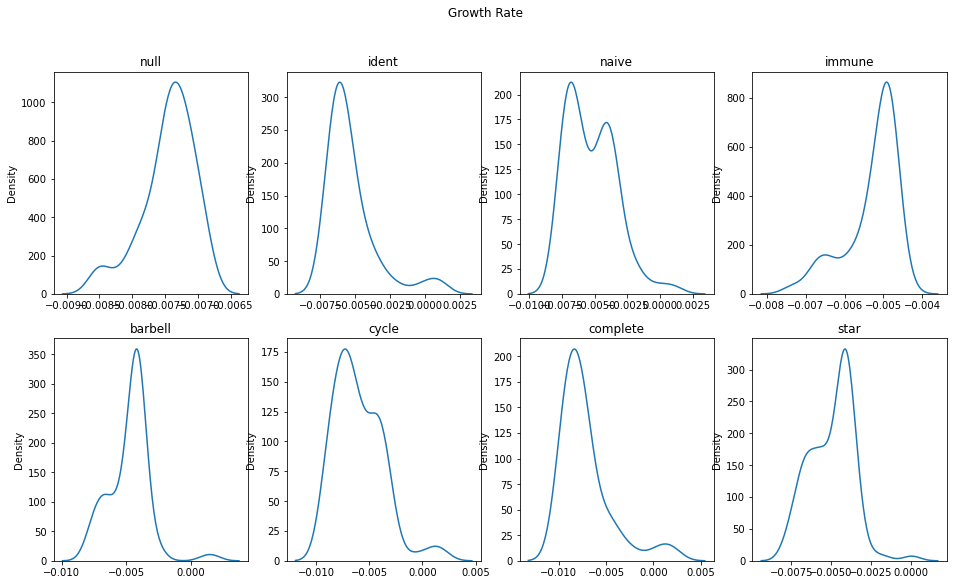

In [8]:
# growth rate plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['growth_rate'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Growth Rate')
plt.show()

/Users/deepikayeramosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


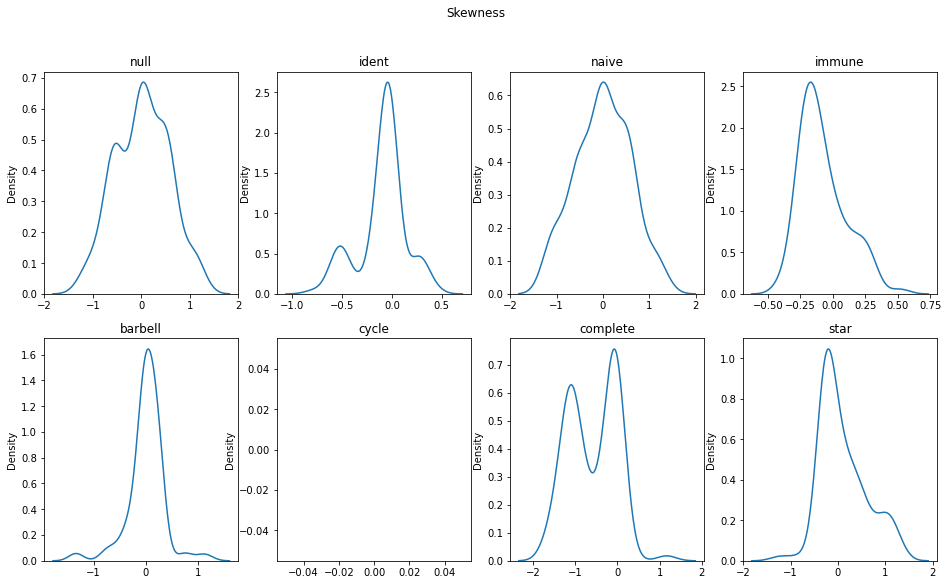

In [9]:
# skewness plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['skewness'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Skewness')
plt.show()

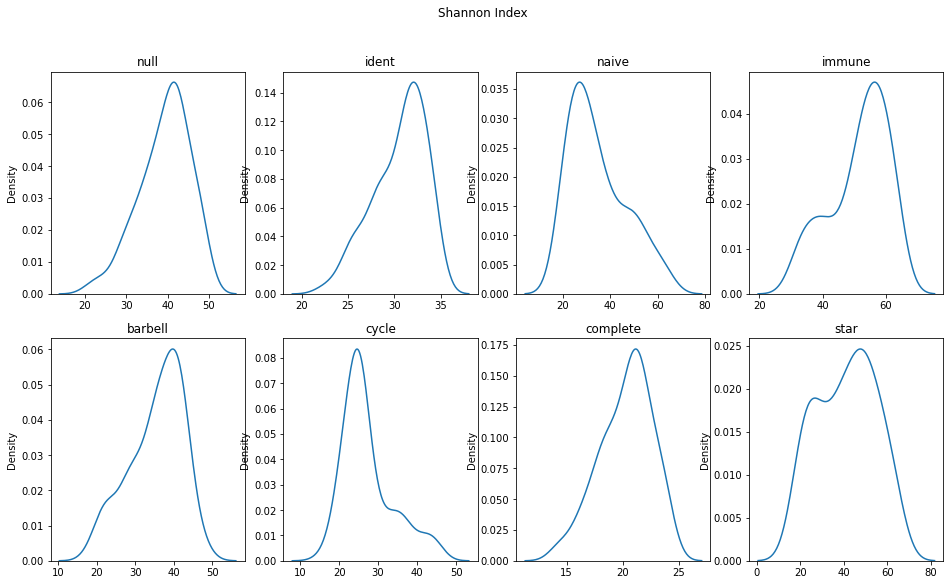

In [10]:
# shannon index plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['shannon_index'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Shannon Index')
plt.show()

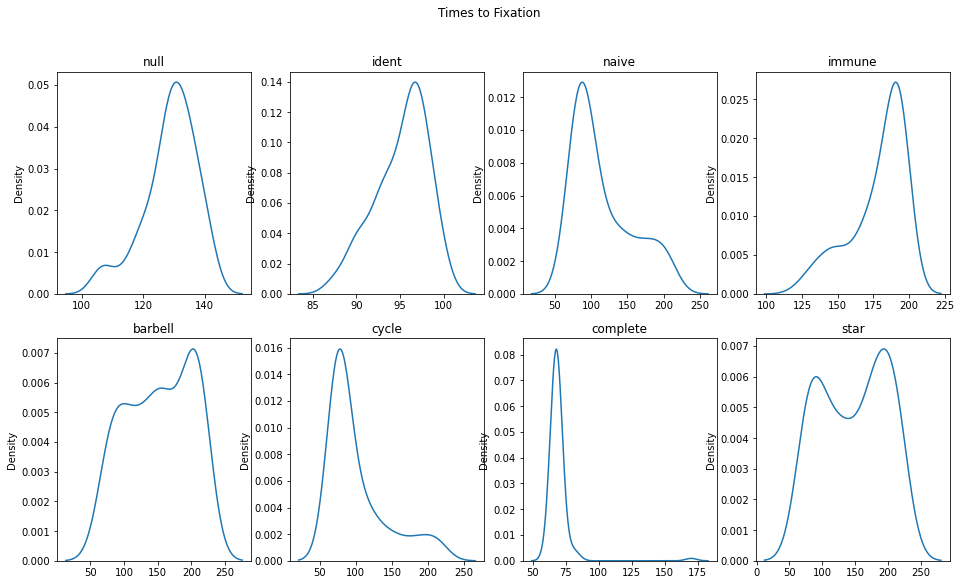

In [11]:
# fixation time plots
# x axis = metric range, y axis = frequency

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['fixation_time'].values
    plt.subplot(2, 4, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Times to Fixation')
plt.show()

In [12]:
# Melt big_df
melted_df = pd.melt(big_df, id_vars =['pattern'], value_vars =['growth_rate', 'skewness', 'shannon_index', 'fixation_time'])

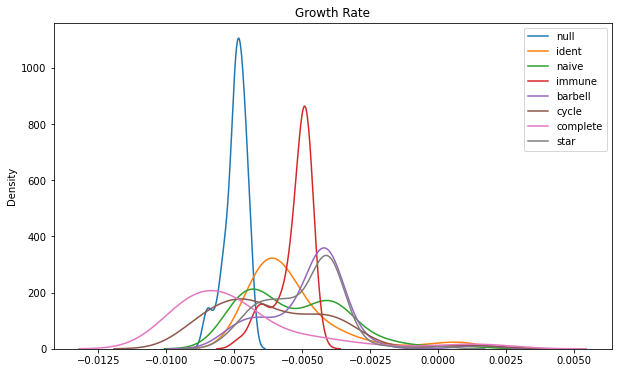

In [17]:
# plot all pattern matrices on one plot showing growth rate

plt.figure(figsize=(10, 6))
i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['growth_rate'].values
    sns.kdeplot(vals, label=pattern_df['pattern'].values[0])
    plt.title('Growth Rate')
    i += 1
    
plt.legend()
plt.show()

/Users/deepikayeramosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


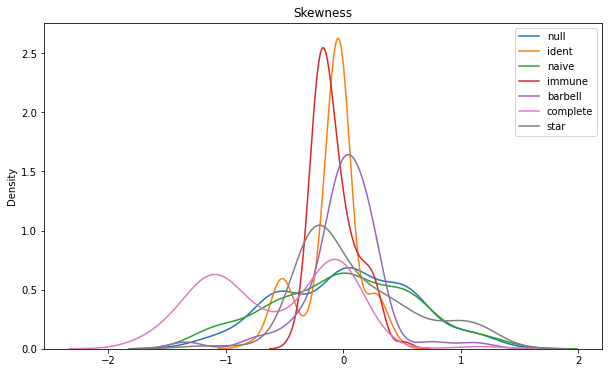

In [18]:
# plot all pattern matrices on one plot showing skewness

plt.figure(figsize=(10, 6))
i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['skewness'].values
    sns.kdeplot(vals, label=pattern_df['pattern'].values[0])
    plt.title('Skewness')
    i += 1

plt.legend()
plt.show()

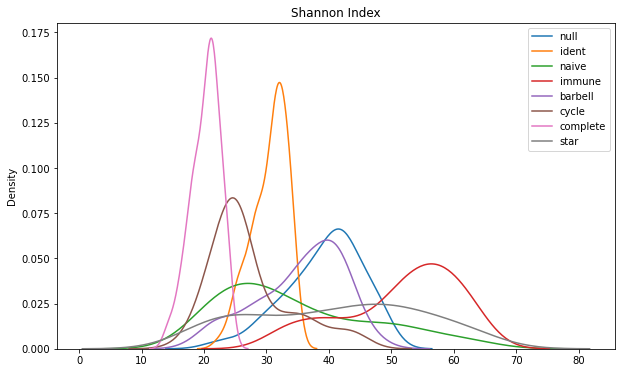

In [20]:
# plot all pattern matrices on one plot showing shannon index

plt.figure(figsize=(10, 6))
i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['shannon_index'].values
    sns.kdeplot(vals, label=pattern_df['pattern'].values[0])
    plt.title('Shannon Index')
    i += 1

plt.legend()
plt.show()

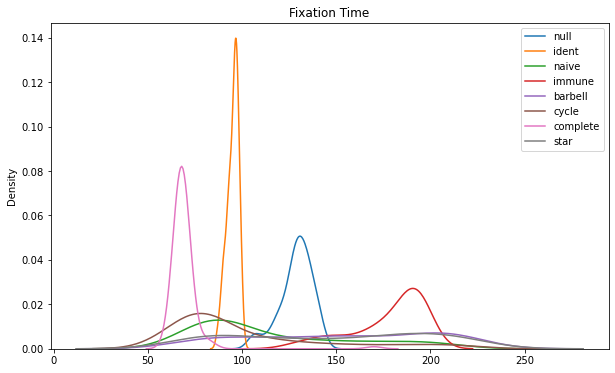

In [16]:
# plot all pattern matrices on one plot showing shannon index

plt.figure(figsize=(10, 6))
i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['fixation_time'].values
    sns.kdeplot(vals, label=pattern_df['pattern'].values[0])
    plt.title('Fixation Time')
    i += 1

plt.legend()
plt.show()